# IKpy Quick-start #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [1]:
import ikpy
import numpy as np
from ikpy import plot_utils

The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("../resources/poppy_ergo.URDF")

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [4]:
target_vector = [ 0.1, -0.2, 0.1]
target_frame = np.eye(4)
target_frame[:3, 3] = target_vector

In [4]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_frame))

The angles of each joints are :  [ 0.          0.77375218 -1.26611491  0.32302884 -0.75260506  1.03033723
  0.        ]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [5]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_frame))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_frame[:3, 3]))

Computed position vector : [ 0.0999999  -0.1999999   0.09999988], original position vector : [ 0.1 -0.2  0.1]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib notebook` line, and uncomment the `%matplotlib inline` line)

(-0.1, 0.1)

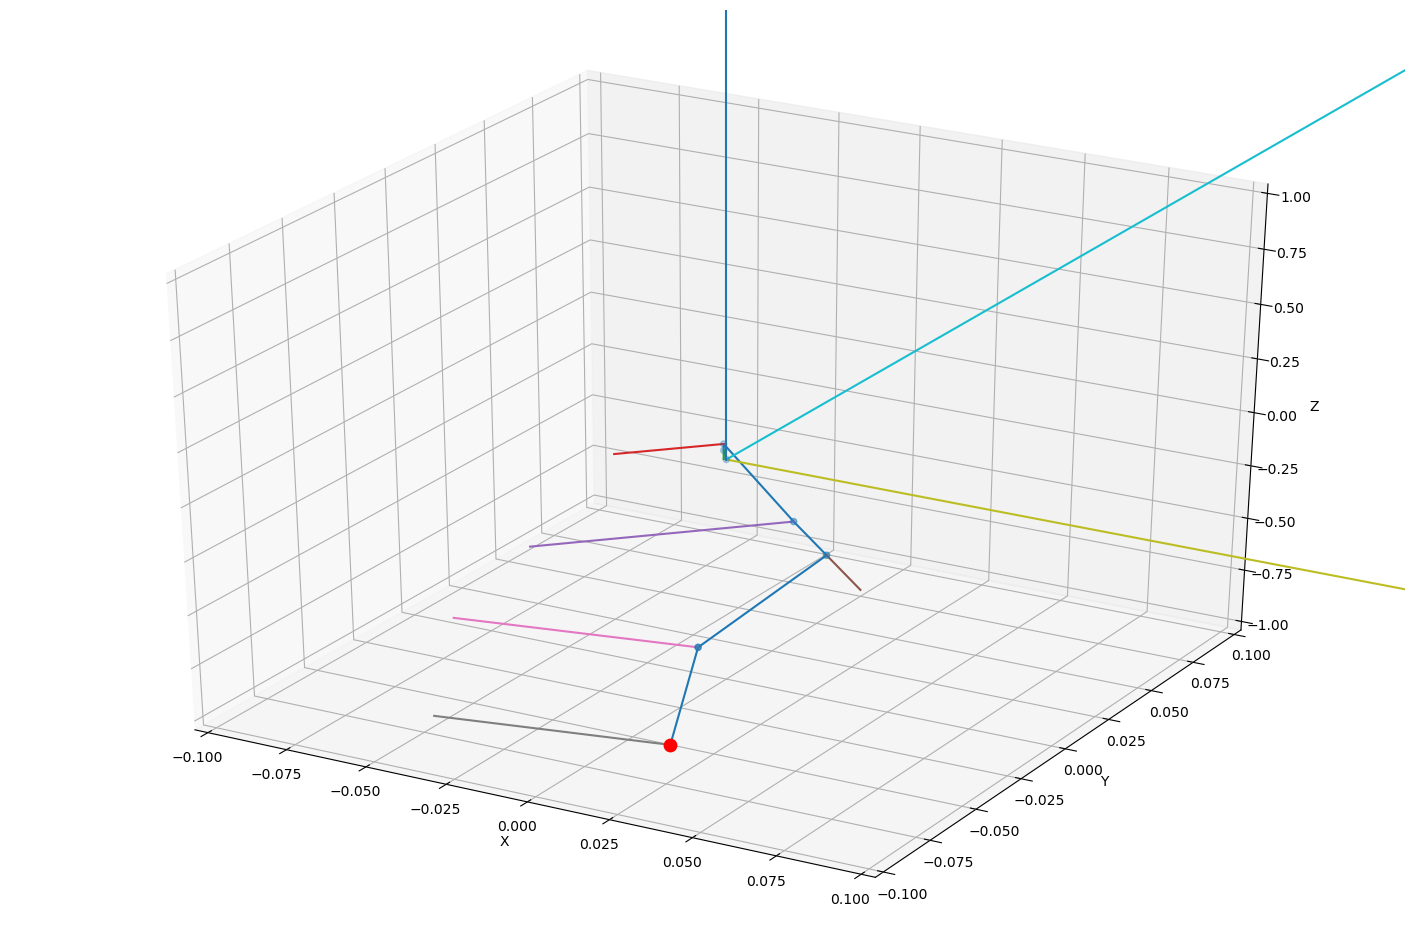

In [7]:
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_frame), ax, target=target_vector)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/blob/master/tutorials/ikpy/getting_started.md) to understand the general concepts of the library.